In [1]:
# here
# it is unsupervised ml method 
# pca rotates dataset in a way such that the rotated features are statistically uncorrelated

In [2]:
import mglearn

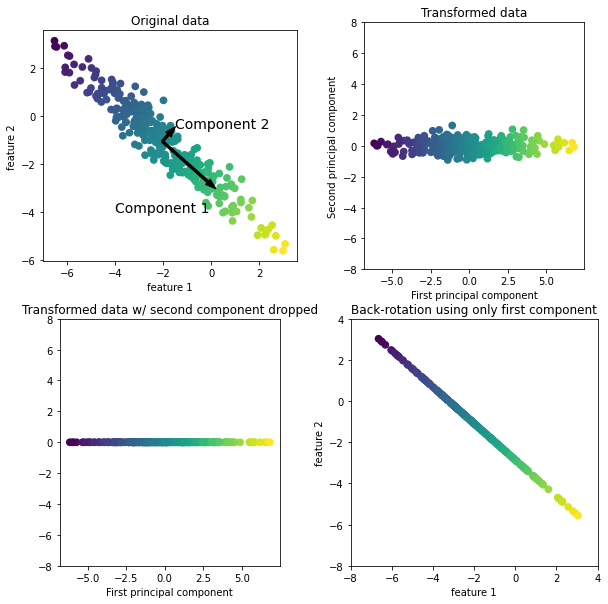

In [4]:
mglearn.plots.plot_pca_illustration()

In [5]:
# the direction in pca signifies the direction where the values are mostly correlated
# second direction -> component 2 gives the values correlated along with first PCA

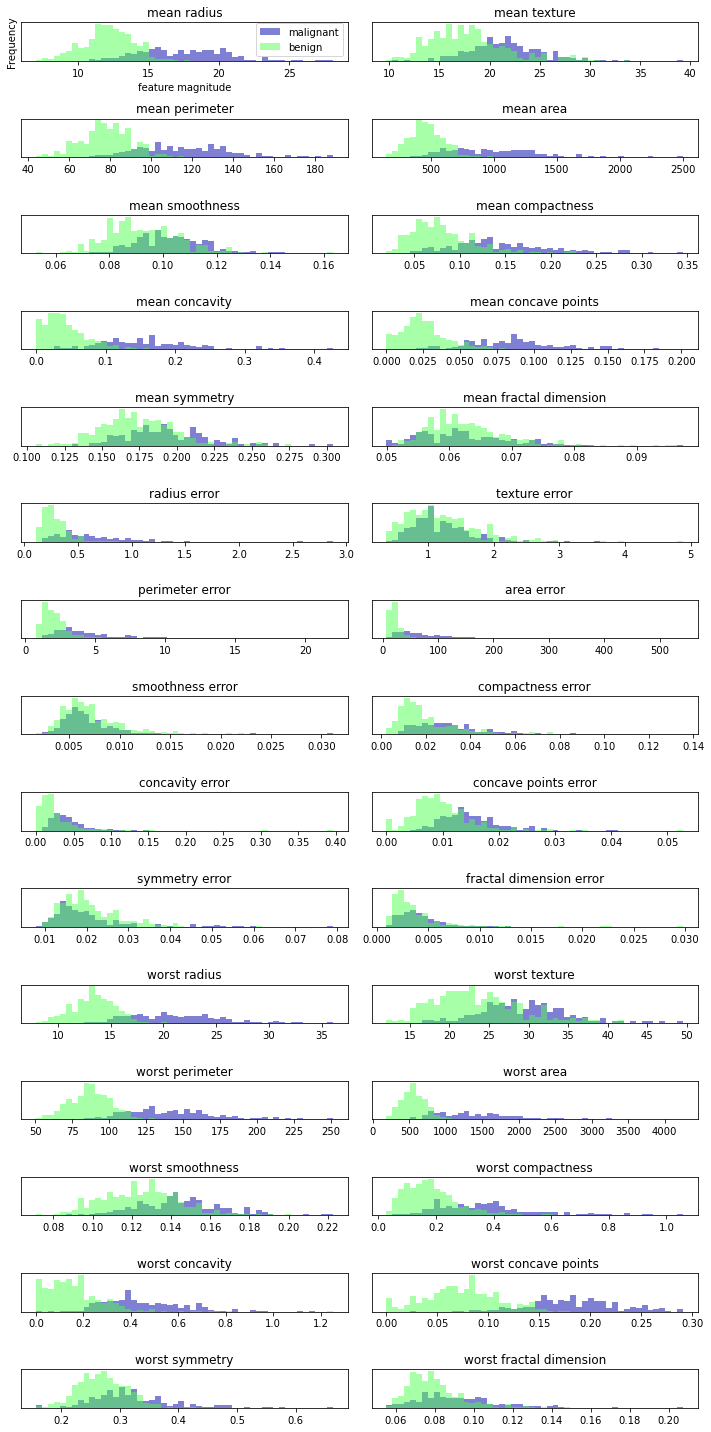

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import matplotlib.pyplot as plt
import numpy as np
fig , axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(['malignant','benign'], loc = "best")
fig.tight_layout()


In [9]:
# the above graph is the histogram of each feature 
# lets aggregrate 30 dimension into 2 PC factors
# before pca scaling is very important

In [12]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [22]:
# pca here
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca.fit(X_scaled)

# transform data onto the first two principle components
X_pca = pca.transform(X_scaled)
print("Original Shape:{}".format(str(X_scaled.shape)))
print("Reduced Shape:{}".format(str(X_pca.shape)))


Original Shape:(569, 30)
Reduced Shape:(569, 2)


Text(0, 0.5, 'PCA2')

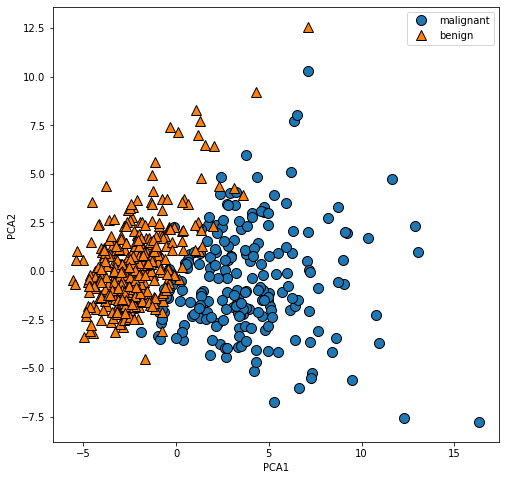

In [25]:
# lets plot the two features 
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc = "best")
#plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [28]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [32]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principle Components')

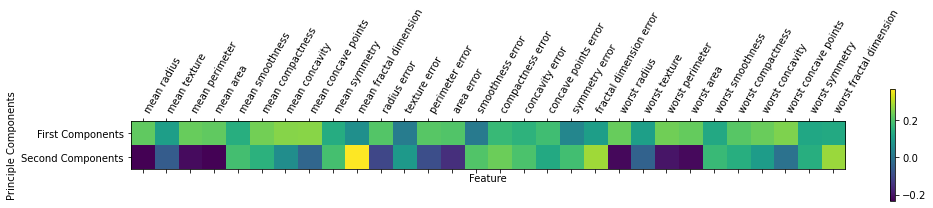

In [40]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],["First Components","Second Components"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha = 'left')
plt.xlabel("Feature")
plt.ylabel("Principle Components")

In [41]:
#another application of pca is feature extraction
# better representation of data which is better suited thatn the original data 

In [42]:
# for here 
#lets do feature extraction of image
# Process used here
# download images 
# use gray scale version
# scale them down
# faster processing


In [43]:
# exploring dataset
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
image_shape = people.images[0].shape

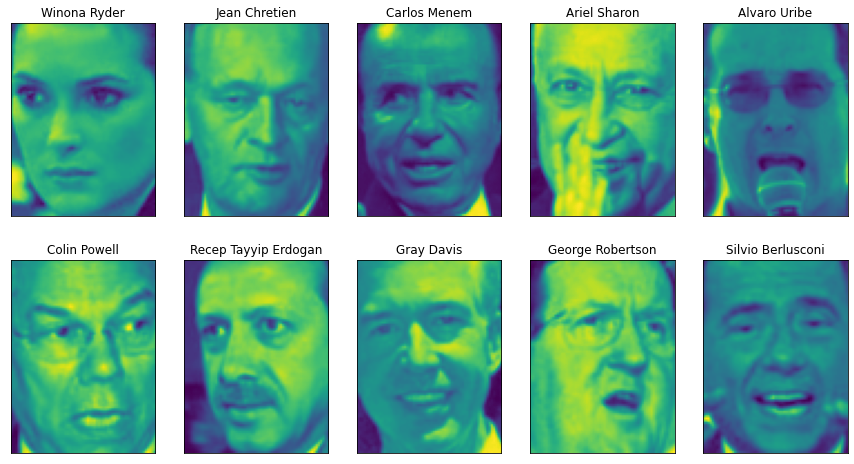

In [46]:
fig, axes = plt.subplots(2,5, figsize = (15,8), subplot_kw ={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [47]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [48]:
# lets explore the distribution of each persons in dataset
# count how many tagret class appears in ds
counts = np.bincount(people.target)

In [51]:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = ' ')
    if (i+1) %3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [52]:
# make data skewed
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# scale the greyscale values to be between 0 and 1
X_people = X_people / 255

/var/folders/ck/22v0x0pj3rvchfgdwdpklf5h0000gn/T/ipykernel_73829/918996690.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype = np.bool)
